# Machine Learning Engineer Nanodegree
## Capstone Project
## Financial Time Series Prediction via Machine Learning

The aim of this project is to explore various machine learning techniques as an attempt to predict Hang Seng index 1-day price movement. 

43 global exchange indices will be used as features, and to predict Hang Seng indices next day movement direction (Up/Down/Neutral). The data in obtained from FactSet Terminal. Data starts from 1st Jan 2010 up to 30th June 2017.


## Loading the data

First, lets load the data and the required libraries

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#Visuals display
%matplotlib inline

#Load the index data
raw_data = pd.read_csv('index_data.csv')
raw_data.set_index(['Date'])

#Relabeling the data
#relabeling the index data
index_close = raw_data.iloc[:,1:]
dates = raw_data.iloc[:,0]

#Display first 5 rows
raw_data.head()



,Date,Hang Seng Index,SSE Composite Index,ASX All Ordinaries,India S&P BSE SENSEX,TOPIX,KOSPI Composite Index,Taiwan TAIEX,FTSE Bursa Malaysia KLCI,FTSE Straits Times Index,...,S&P 500,DJ Industrial Average,Colombia IGBC,Canada S&P/TSX Composite,Brazil Bovespa Index,Mexico IPC,Israel TA-125,Saudi Arabia All Share (TASI),FTSE JSE All Share,Abu Dhabi Securities Exchange
0,20100101,21872.50,3277.139,4882.7,17464.81,907.59,1682.77,8188.11,1272.78,2897.62,...,1115.100,10428.05,11602.14,11746.11,68588.41,32120.47,1064.98,6121.76,27666.45,2743.61
1,20100104,21823.28,3243.760,4889.8,17558.73,915.75,1696.14,8207.85,1275.75,2894.55,...,1132.990,10583.96,11641.37,11866.90,70045.08,32758.53,1089.34,6201.76,27895.19,2758.09
2,20100105,22279.58,3282.179,4939.5,17686.24,919.57,1690.62,8211.40,1288.24,2920.28,...,1136.520,10572.02,11628.92,11888.08,70239.82,32732.76,1098.20,6239.10,27998.87,2774.50
3,20100106,22416.67,3254.215,4946.8,17701.13,931.13,1705.32,8327.62,1293.17,2930.49,...,1137.140,10573.68,11626.59,11944.54,70729.34,32830.16,1098.31,6260.90,28080.36,2766.53
4,20100107,22269.45,3192.776,4930.5,17615.72,931.85,1683.45,8237.42,1291.42,2913.25,...,1141.695,10606.86,11594.89,11887.51,70451.12,33064.57,1094.04,6260.90,28017.81,2775.50


## Data Preprocessing and Descriptive Analysis

First is to have some high-level understanding of the data. This is to evaluate whether the data is suitable to be used as an input to the machine learning algorithm directly, or any preprocessing is needed.

As a start, lets take a look at the descriptive statistics of our data.

In [2]:
index_close.describe() #Descriptive Statistics of the data

,Hang Seng Index,SSE Composite Index,ASX All Ordinaries,India S&P BSE SENSEX,TOPIX,KOSPI Composite Index,Taiwan TAIEX,FTSE Bursa Malaysia KLCI,FTSE Straits Times Index,Philippines PSE PSEi,...,S&P 500,DJ Industrial Average,Colombia IGBC,Canada S&P/TSX Composite,Brazil Bovespa Index,Mexico IPC,Israel TA-125,Saudi Arabia All Share (TASI),FTSE JSE All Share,Abu Dhabi Securities Exchange
count,1956.000000,1956.000000,1956.000000,1956.000000,1956.000000,1956.000000,1956.000000,1956.000000,1956.000000,1956.000000,...,1956.000000,1956.000000,1956.000000,1956.000000,1956.000000,1956.000000,1956.000000,1956.000000,1956.000000,1956.000000
mean,22276.820501,2724.053348,5041.915798,22191.398149,1139.881702,1961.785521,8439.770174,1642.514407,3061.693972,5952.855629,...,1692.874691,15096.830410,12412.763400,13420.279821,57292.208102,40957.118853,1184.305598,7374.647163,42081.600133,3649.488850
std,1970.601039,570.180086,503.807676,4533.157195,296.974060,130.642204,783.332594,154.248010,210.615936,1496.427382,...,400.781168,3042.628847,2024.428455,1267.033795,7373.248126,4731.786934,129.013558,1272.338004,9302.089342,951.918538
min,16250.270000,1950.012500,3927.600000,15175.080000,695.510000,1552.790000,6633.330000,1233.860000,2528.710000,2797.610000,...,1022.580000,9686.480000,7849.510000,11092.500000,37497.477000,30368.080000,897.980000,5323.270000,25793.060000,2293.090000
25%,20856.125000,2235.232075,4633.075000,18200.950000,849.330000,1907.787500,7829.510000,1547.295000,2883.242500,4372.585000,...,1319.002500,12417.740750,10215.467500,12323.442500,51804.325000,37332.250000,1079.187500,6457.757500,32633.167500,2653.702500
50%,22482.000000,2686.009050,5088.050000,20365.095000,1178.115000,1976.710000,8412.440000,1657.094182,3070.810000,6463.375000,...,1700.255000,15489.520000,13051.760000,13358.250000,56876.475000,41756.060000,1206.710000,6942.175000,43805.910000,3842.350000
75%,23458.257500,3083.532725,5436.925000,26672.597500,1376.412500,2030.705000,9040.780000,1770.150643,3226.840000,7227.730000,...,2061.825000,17667.950000,14117.392500,14565.937500,63300.895000,44678.395000,1274.832500,8034.052500,51300.380000,4535.010000
max,28442.750000,5166.350000,5976.400000,31311.570000,1691.290000,2395.660000,10513.960000,1892.653455,3539.950000,8127.480000,...,2453.460000,21528.990000,16278.880000,15922.370000,72995.690000,49939.470000,1503.530000,11149.360000,55188.340000,5253.410000


The first thing we see would be different indices are at different levels. For example, SSE composite has mean level at around 570.18 while Hang Seng is 22276.82. Therefore, the data needs to be normalized so that when we feed the data into the machine learning algorithm, effects will not be dominated by a single index.

Next, lets visualize the data.

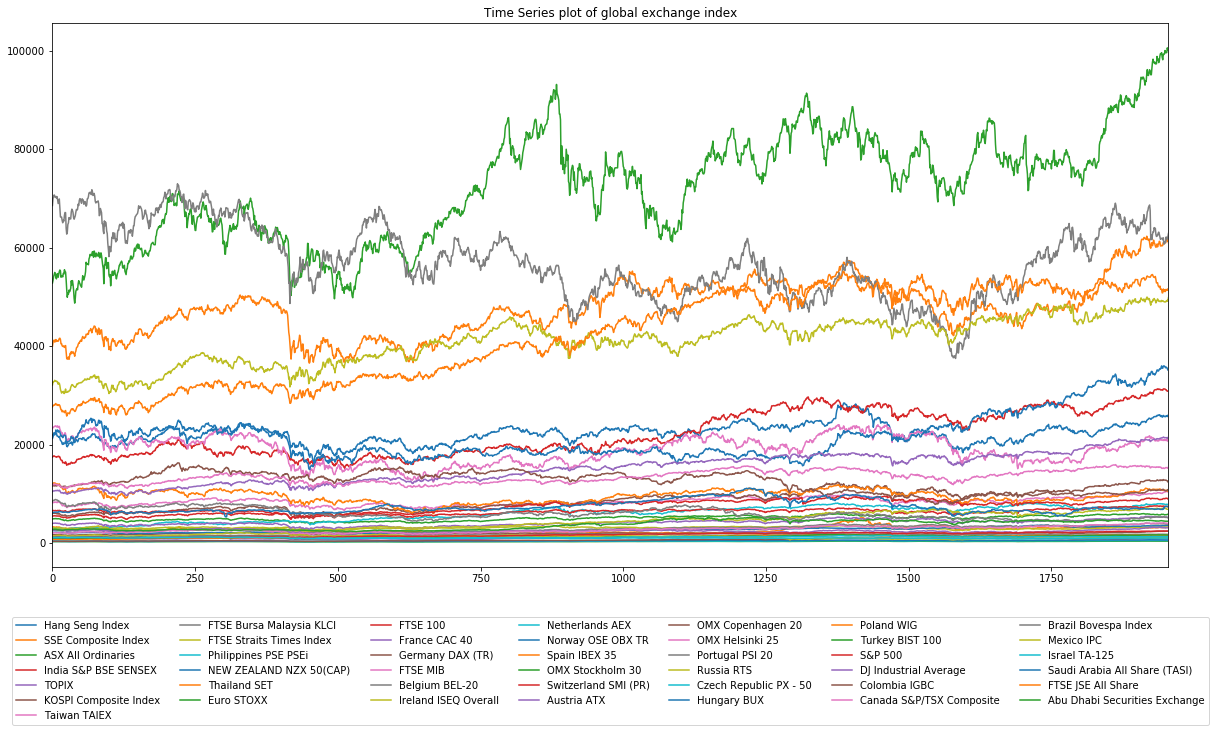

In [11]:
index_close.plot(figsize=(20,10), title='Time Series plot of global exchange index').legend(loc='lower center', ncol=7, bbox_to_anchor=(0.5,-0.3))


Again this confirms that the data needs to be scaled before serving as an input. In addiiton, all of the indices seem to have trends. We will need to de-trend the time-series (i.e. to make it stationary) for our models to work. A typical way is to apply a first-order differencing to the series.

In [4]:
#Calculate log returns.
daily_ret = np.log(index_close/index_close.shift(1))

#Remove first row
daily_ret = daily_ret.drop(daily_ret.index[0]).reset_index(drop=True)
dates = dates.drop(dates.index[0]).reset_index(drop=True)

daily_ret.head()


,Hang Seng Index,SSE Composite Index,ASX All Ordinaries,India S&P BSE SENSEX,TOPIX,KOSPI Composite Index,Taiwan TAIEX,FTSE Bursa Malaysia KLCI,FTSE Straits Times Index,Philippines PSE PSEi,...,S&P 500,DJ Industrial Average,Colombia IGBC,Canada S&P/TSX Composite,Brazil Bovespa Index,Mexico IPC,Israel TA-125,Saudi Arabia All Share (TASI),FTSE JSE All Share,Abu Dhabi Securities Exchange
0,-0.002253,-0.010238,0.001453,0.005363,0.008951,0.007914,0.002408,0.002331,-0.001060,-0.015739,...,0.015916,0.014840,0.003376,0.010231,0.021015,0.019670,0.022616,0.012983,0.008234,0.005264
1,0.020693,0.011774,0.010113,0.007236,0.004163,-0.003260,0.000432,0.009743,0.008850,0.007773,...,0.003111,-0.001129,-0.001070,0.001783,0.002776,-0.000787,0.008100,0.006003,0.003710,0.005932
2,0.006134,-0.008556,0.001477,0.000842,0.012493,0.008657,0.014054,0.003820,0.003490,0.003780,...,0.000545,0.000157,-0.000200,0.004738,0.006945,0.002971,0.000100,0.003488,0.002906,-0.002877
3,-0.006589,-0.019060,-0.003301,-0.004837,0.000773,-0.012908,-0.010891,-0.001354,-0.005900,0.012374,...,0.003998,0.003133,-0.002730,-0.004786,-0.003941,0.007115,-0.003895,0.000000,-0.002230,0.003237
4,0.001225,0.001008,0.002370,-0.004291,0.010079,0.006991,0.005264,0.001207,0.003259,-0.000195,...,0.002873,0.001068,0.004502,0.005563,-0.002678,-0.005232,0.000000,0.000000,0.008838,0.000000


In [5]:
#Discriptive statistics for the returns data
daily_ret.describe()

,Hang Seng Index,SSE Composite Index,ASX All Ordinaries,India S&P BSE SENSEX,TOPIX,KOSPI Composite Index,Taiwan TAIEX,FTSE Bursa Malaysia KLCI,FTSE Straits Times Index,Philippines PSE PSEi,...,S&P 500,DJ Industrial Average,Colombia IGBC,Canada S&P/TSX Composite,Brazil Bovespa Index,Mexico IPC,Israel TA-125,Saudi Arabia All Share (TASI),FTSE JSE All Share,Abu Dhabi Securities Exchange
count,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,...,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000
mean,0.000084,-0.000013,0.000085,0.000292,0.000294,0.000180,0.000122,0.000167,0.000055,0.000483,...,0.000397,0.000367,-0.000032,0.000131,-0.000044,0.000225,0.000098,0.000099,0.000319,0.000245
std,0.011282,0.013897,0.008745,0.009770,0.012612,0.009405,0.009256,0.005559,0.007902,0.010368,...,0.009375,0.008713,0.009512,0.007978,0.014261,0.008936,0.008768,0.011350,0.009482,0.008859
min,-0.060183,-0.088732,-0.042998,-0.061197,-0.099519,-0.064202,-0.057422,-0.027381,-0.055387,-0.069885,...,-0.068958,-0.057061,-0.050146,-0.041227,-0.092110,-0.060620,-0.082087,-0.131626,-0.036939,-0.071549
25%,-0.005452,-0.005371,-0.004649,-0.004691,-0.005906,-0.003985,-0.004041,-0.002583,-0.003901,-0.004847,...,-0.003318,-0.003146,-0.004548,-0.003939,-0.008172,-0.004330,-0.002659,-0.001567,-0.004708,-0.002278
50%,0.000000,0.000000,0.000305,0.000000,0.000031,0.000000,0.000000,0.000052,0.000000,0.000153,...,0.000263,0.000279,0.000000,0.000368,0.000000,0.000028,0.000000,0.000000,0.000154,0.000000
75%,0.005900,0.006047,0.005148,0.005693,0.007111,0.004980,0.005121,0.003095,0.004381,0.006243,...,0.004931,0.004609,0.004856,0.004449,0.008059,0.005296,0.003524,0.002988,0.006011,0.003307
max,0.055187,0.056036,0.034368,0.037035,0.077153,0.049000,0.044594,0.033222,0.032896,0.055419,...,0.046317,0.041533,0.042654,0.039410,0.063873,0.041672,0.041516,0.111428,0.042332,0.064875


Another thing to note, and also very common to financial time-series is a potential look-ahead bias. For example, for S&P 500 closes at 1600 ET, while Hang Seng closes at 0400 ET the day before. Therefore, we need to apply a proper lag to the index data, depending on where it is trading. We will assume we are a Hong Kong based investor, and operate in Hong Kong timezone.

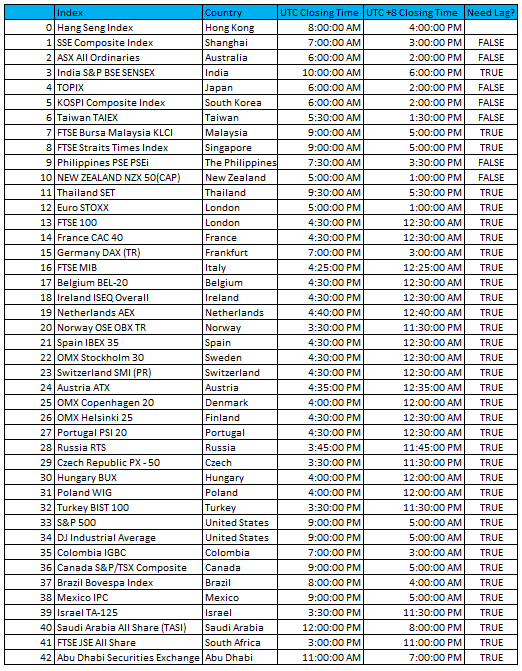

Source: https://en.wikipedia.org/wiki/List_of_stock_exchange_opening_times

In [6]:
#Seperate the indices into 2 classes - lag or no_lag
no_lag = [0, 1, 2, 4, 5, 6, 9, 10]
lag = [i for i in range(0,43) if i not in no_lag]

#Processing the dataset by applying appropriate lags
lagged_data = daily_ret.iloc[:,lag].shift(1)
lagged_data = pd.concat([daily_ret.iloc[:,no_lag], lagged_data], axis=1)

#Removing the first row
lagged_data = lagged_data.drop(lagged_data.index[0]).reset_index(drop=True)
dates = dates.drop(dates.index[0]).reset_index(drop=True)

lagged_data.head()



,Hang Seng Index,SSE Composite Index,ASX All Ordinaries,TOPIX,KOSPI Composite Index,Taiwan TAIEX,Philippines PSE PSEi,NEW ZEALAND NZX 50(CAP),India S&P BSE SENSEX,FTSE Bursa Malaysia KLCI,...,S&P 500,DJ Industrial Average,Colombia IGBC,Canada S&P/TSX Composite,Brazil Bovespa Index,Mexico IPC,Israel TA-125,Saudi Arabia All Share (TASI),FTSE JSE All Share,Abu Dhabi Securities Exchange
0,0.020693,0.011774,0.010113,0.004163,-0.003260,0.000432,0.007773,0.011709,0.005363,0.002331,...,0.015916,0.014840,0.003376,0.010231,0.021015,0.019670,0.022616,0.012983,0.008234,0.005264
1,0.006134,-0.008556,0.001477,0.012493,0.008657,0.014054,0.003780,0.001034,0.007236,0.009743,...,0.003111,-0.001129,-0.001070,0.001783,0.002776,-0.000787,0.008100,0.006003,0.003710,0.005932
2,-0.006589,-0.019060,-0.003301,0.000773,-0.012908,-0.010891,0.012374,0.004042,0.000842,0.003820,...,0.000545,0.000157,-0.000200,0.004738,0.006945,0.002971,0.000100,0.003488,0.002906,-0.002877
3,0.001225,0.001008,0.002370,0.010079,0.006991,0.005264,-0.000195,0.007707,-0.004837,-0.001354,...,0.003998,0.003133,-0.002730,-0.004786,-0.003941,0.007115,-0.003895,0.000000,-0.002230,0.003237
4,0.005134,0.005228,0.007860,0.000000,-0.000673,0.005170,0.003300,-0.001958,-0.004291,0.001207,...,0.002873,0.001068,0.004502,0.005563,-0.002678,-0.005232,0.000000,0.000000,0.008838,0.000000


Now we have a processed dataset. Lets take a look at their correlation structure

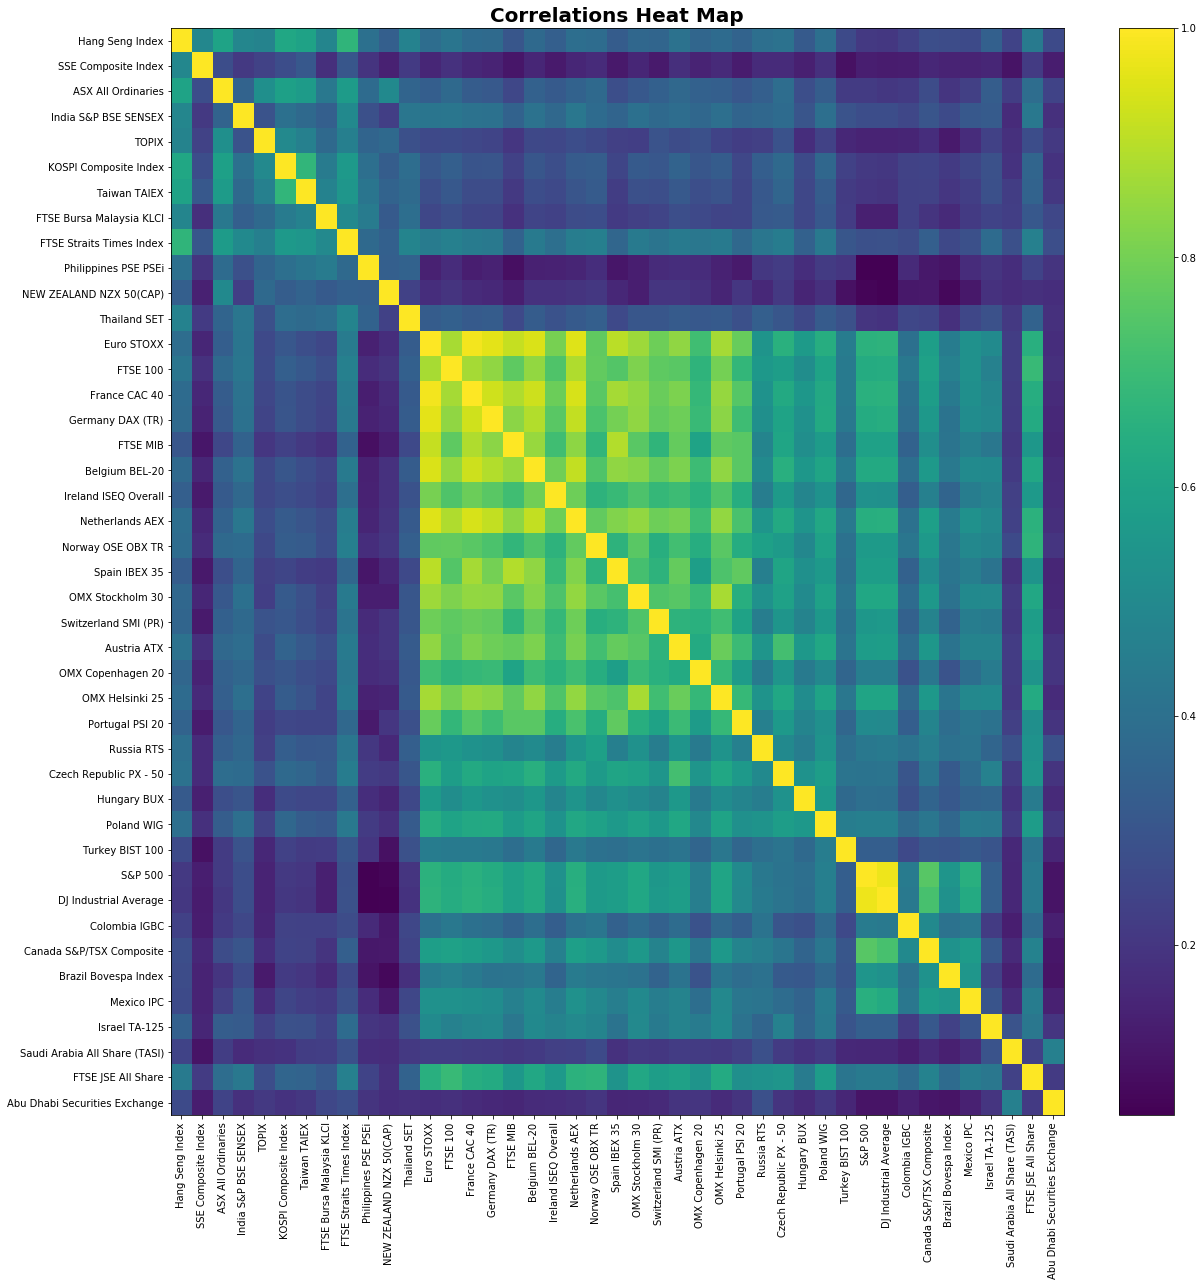

In [7]:
#Calculate correlation
corr = daily_ret.corr()

#Plot the correlation heatmap
plt.figure(figsize=(20,20))
plt.imshow(corr, aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns)
plt.title('Correlations Heat Map', fontsize=20, fontweight='bold')
plt.show()

From the above chart, you can see indices within the same geographic region tends to have higher correlations. The Asia-Pacific indices tends to have a higher correlations, while those indices have lower correlations with the Europe ones. 

What is more interesting to see, is the euro-zone indices have very high correlations, in particular the developed economies within the region. Perhaps this is explained by very close economic ties amongst those countries, therefore their stock markets tend to have a very high correlation.

Finally, the US indices tend to have higher average correlations to all the other indices. In particular, we can see developed market indices (e.g. Hong Kong, Japan, Singapore) have high correlation compared to developing markets (e.g. Thailand, Philippines). 

## Apply Machine Learning to the data
Now we have the preprocessed data, we can then apply machine learning techniques to learn the data and perform predictions. 

Cross-validation for time series is different from the randomized sampling. An obvious reason is the data is time series in nature, and you do not want to run predictions based on a future time point. Instead splitting the data into training, validation and test sets, we first split the data into n folds, and at the k-th split, the training set is the first k-folds, and the test set will be the (k+1)th fold


In [8]:
from sklearn.model_selection import TimeSeriesSplit

#Seperate the features and the labels
labels = daily_ret.iloc[:,0]
X = daily_ret.drop(daily_ret.columns[0], axis=1).reset_index(drop=True)

#Generate the labels from daily Hang Seng returns
y = np.empty(labels.shape)
y[labels < -0.0005] = -1 #Label -1 for returns lower than -0.05%
y[labels > 0.0005] = 1 #Label 1 for returns greater than 0.05%
y[(labels <= 0.0005 ) & (labels >= -0.0005)] = 0 #Label 0 for the rest

#Splitting into training-validation-test sets
n_splits = 3
tscv = TimeSeriesSplit(n_splits=n_splits)


### Benchmark Model
We first generate the benchmark model. We pick the Gaussian Naive Bayes as stock return distributions are empirically close to Gaussian.

In [9]:
#Import Gaussian Naive Bayes module and performance metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import fbeta_score, precision_score, make_scorer
from sklearn.model_selection import cross_val_score


#Make Scorer object for cross-validation
fbeta = make_scorer(fbeta_score, beta=0.6, average='macro')
precision = make_scorer(precision_score, average='macro')

#Initiate
gnb_estimator = GaussianNB()

#Fit and predict on the CVs
fbeta_gnb = cross_val_score(gnb_estimator, X, y, cv=tscv, scoring=fbeta)
precision_gnb = cross_val_score(gnb_estimator, X, y, cv=tscv, scoring=precision)
    
print("Average F-beta Score: %3.4f" % np.mean(fbeta_gnb))
print("Average Precision Score: %3.4f" % np.mean(precision_gnb))


Average F-beta Score: 0.4922
Average Precision Score: 0.5441


The benchmark model has an F-beta 0.4922 and precision score 0.5441, which is not a bad start. F-beta score is lower than the precision, suggests that some class prediction is better than others.

### Fitting other models
#### 1. Logistics Regression
First model we will try is the simpliest logistics regression model. Classical finance literature often uses linear models to explain asset prices, so this will be our first step.

In [10]:
#Import Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

#Define hyperparameter in logistic regression for grid-search
logit_param = {'C':np.linspace(1e-10, 1e10, 20), 'penalty':['l1','l2']}

#Fit the data using Time-Series CV
logit_estimator = GridSearchCV(LogisticRegression(), logit_param, cv=tscv, refit=True, scoring=fbeta)
logit_estimator.fit(X, y)

#Fit and predict on the CVs
fbeta_logit = cross_val_score(logit_estimator.best_estimator_, X, y, cv=tscv, scoring=fbeta)
precision_logit = cross_val_score(logit_estimator.best_estimator_, X, y, cv=tscv, scoring=precision)
    
print("Average F-beta Score: %3.4f" % np.mean(fbeta_logit))
print("Average Precision Score: %3.4f \n" % np.mean(precision_logit))

print("Best C: %3.4f" % logit_estimator.best_params_['C'])
print("Model: %s" % logit_estimator.best_estimator_)

Average F-beta Score: 0.4692
Average Precision Score: 0.4577 

Best C: 1052631578.9474
Model: LogisticRegression(C=1052631578.9473684, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


We can see when we fit a logistic regression, this model is worse than our benchmark model, with an decrease in F-beta score . During ther grid search, there are C values where no 'Neutral' labels are predicted.

The best logistic regression model chosen is with a L1 regulatization, with C = 1052631578.9474.

Next, lets zoom in the classification results on each fold using the best model.

In [11]:
#Import neccesary function
from sklearn.metrics import classification_report

#Running index
iteration = 1

for train_index, test_index in tscv.split(X):
    predict_logistic = logit_estimator.best_estimator_.fit(X.iloc[train_index,:], y[train_index]).predict(X.iloc[test_index, :])
    print('Split: %d' % iteration)
    print('Training Size: %d; Test Size: %d' % (len(train_index), len(test_index)))
    print(classification_report(y[test_index], predict_logistic, target_names=['Up', 'Neutral', 'Down']))
    print('\n')
    iteration += 1

Split: 1
Training Size: 491; Test Size: 488
             precision    recall  f1-score   support

         Up       0.66      0.76      0.71       209
    Neutral       0.00      0.00      0.00        47
       Down       0.70      0.74      0.72       232

avg / total       0.61      0.68      0.64       488



Split: 2
Training Size: 979; Test Size: 488
             precision    recall  f1-score   support

         Up       0.66      0.69      0.68       213
    Neutral       0.00      0.00      0.00        51
       Down       0.64      0.75      0.69       224

avg / total       0.58      0.65      0.61       488



Split: 3
Training Size: 1467; Test Size: 488
             precision    recall  f1-score   support

         Up       0.72      0.78      0.75       216
    Neutral       0.00      0.00      0.00        46
       Down       0.74      0.84      0.79       226

avg / total       0.66      0.73      0.70       488





As we feed in more training data, the model has better 'Up' label precision. Also note that there are no 'Neutral' predictions. This has practical consequences, as having no 'Neutral' prediction suggests you will need to trade everyday, but in fact you might not need to. Nonethless, fitting a logistic regression is not bad in this very simple case, but lets see if we can do better.

#### 2. AdaBoost
Next we will try an ensemble methods to see if that improves our predictability.

In [12]:
#Import Ensemble methods
from sklearn.ensemble import AdaBoostClassifier

#Set Parameters for AdaBoost Grid Search
adaboost_param = {'n_estimators':[1,10,100,300,500], 'learning_rate':[0.001,0.01,0.1,1,10]}

#Set Grid Search and fit
adaboost_estimator = GridSearchCV(AdaBoostClassifier(random_state=10), adaboost_param, cv=tscv, refit=True, scoring=fbeta)
adaboost_estimator.fit(X, y)

#Calculate F-beta and precision score
fbeta_adaboost = cross_val_score(adaboost_estimator.best_estimator_, X, y, cv=tscv, scoring=fbeta)
precision_adaboost = cross_val_score(adaboost_estimator.best_estimator_, X, y, cv=tscv, scoring=precision)
    
print("Average F-beta Score: %3.4f" % np.mean(fbeta_adaboost))
print("Average Precision Score: %3.4f" % np.mean(precision_adaboost))

print("Best number of estimators: %d" % adaboost_estimator.best_params_['n_estimators'])
print("Best learning rate: %3.4f" % adaboost_estimator.best_params_['learning_rate'])
print("Model: %s" % adaboost_estimator.best_estimator_)

Average F-beta Score: 0.6174
Average Precision Score: 0.6827
Best number of estimators: 500
Best learning rate: 0.1000
Model: AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.1, n_estimators=500, random_state=10)


In [13]:
#Running index
iteration = 1

for train_index, test_index in tscv.split(X):
    predict_logistic = adaboost_estimator.best_estimator_.fit(X.iloc[train_index,:], y[train_index]).predict(X.iloc[test_index, :])
    print('Split: %d' % iteration)
    print('Training Size: %d; Test Size: %d' % (len(train_index), len(test_index)))
    print(classification_report(y[test_index], predict_logistic, target_names=['Up', 'Neutral', 'Down']))
    print('\n')
    iteration += 1

Split: 1
Training Size: 491; Test Size: 488
             precision    recall  f1-score   support

         Up       0.69      0.76      0.72       209
    Neutral       0.56      0.19      0.29        47
       Down       0.72      0.75      0.73       232

avg / total       0.69      0.70      0.68       488



Split: 2
Training Size: 979; Test Size: 488
             precision    recall  f1-score   support

         Up       0.67      0.69      0.68       213
    Neutral       0.69      0.22      0.33        51
       Down       0.67      0.75      0.71       224

avg / total       0.67      0.67      0.66       488



Split: 3
Training Size: 1467; Test Size: 488
             precision    recall  f1-score   support

         Up       0.71      0.75      0.73       216
    Neutral       0.71      0.26      0.38        46
       Down       0.74      0.78      0.76       226

avg / total       0.72      0.72      0.71       488





We can see by using Adaboost, there is an overall improvement in the fitting. Precision has been improved, and at the same time the overall F-beta score has improved from 0.4692 to 0.6174. Therefore, Adaboost seems to be a better choice over logistic regression. Also, from the classification report, the AdaBoost model is better than logistic regression as there are Neutral labels predicted, thus improving the overall F-beta score.

We can generate chart plotting the feature importance on the optimized model.

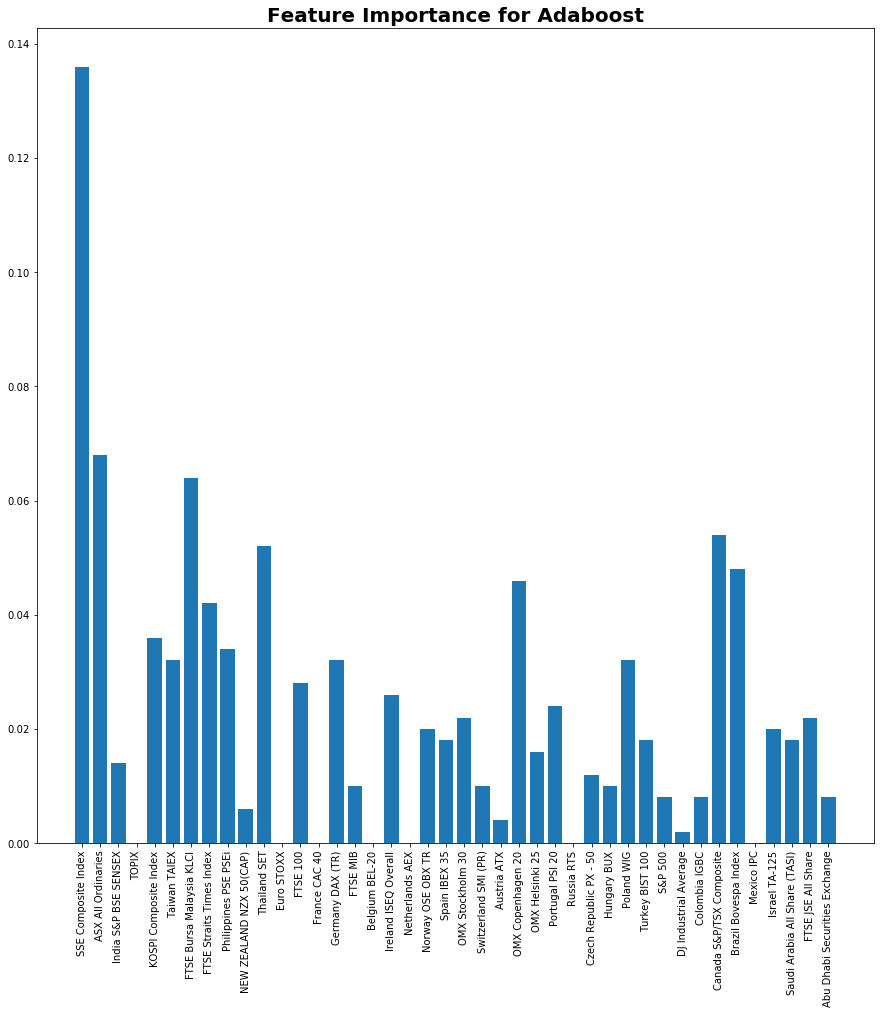

In [14]:
importance = adaboost_estimator.best_estimator_.feature_importances_ #Get importance coefficients

ind = np.arange(len(importance))

#Plot chart
fig = plt.figure(figsize=(15,15))
plt.bar(ind, importance)
plt.xticks(ind, X.columns, rotation='vertical')
plt.title('Feature Importance for Adaboost', fontsize=20, fontweight='bold')
plt.show()

Without surprise, we see that indices within Asia-Pacific region has more importance in predicting Hang Seng index's movement. Again they sit in the same timezone, and their economies are more closely ties to each other so it is expected. Also companies that are constituents within Hang Seng are likely to have business within the region as well, this will also contribute to the significance of the feature. To my surprise, TOPIX has no significance in predicting Hang Seng.

Within Europe, UK has the highest significance, and some contributions are coming from smaller economies like Czech, Portugal and Hungary.

Interestingly, US indices seem to have minor predictive power in Hang Seng movements. S&P 500 only has around 0.01 importance, and DJ Average has none. While Canada, Brazil and Mexico has high importance is something quite interesting to see as well.




#### 3. Feedforward Neural Network
Next we will turn to deep learning techniques to see if this will further improve our prediction. First we will look at a simple Feedforward Neural Network. 

We will using Keras library with a tensorflow backend as the main Neural Network library. 

In [15]:
#Import Keras module
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils.np_utils import to_categorical

#Splitting the data into 80% training and 20% test, but has to preserve the ordering
train_size = 0.8
cut_index = int(np.floor(train_size * X.shape[0]))
X_train = np.array(X.iloc[0:(cut_index-1),:])
X_test = np.array(X.iloc[cut_index:X.shape[0],:])
y_train = y[0:(cut_index-1)]
y_test = y[cut_index:len(y)]

#Checking
#if X_train.shape[0] == len(y_train):
    #print("Yes")
#if X_test.shape[0] == len(y_test):
    #print("Yes")
#print(X_train.head())
#print(X_test.head())
#print(y_train)
#print(y_test)

#Parameters
drop_out = 0.6
input_dim = X.shape[1]
num_epoch = 100

#Preproc the y_train and y_test using to_categorical function
y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)


Using TensorFlow backend.


In [16]:
from keras import backend as K

#Define f-beta score
def fbeta(y_true, y_pred, threshold_shift=0):
    beta = 0.6

    # just in case of hipster activation at the final layer
    y_pred = K.clip(y_pred, 0, 1)

    # shifting the prediction threshold from .5 if needed
    y_pred_bin = K.round(y_pred + threshold_shift)

    tp = K.sum(K.round(y_true * y_pred_bin), axis=1) + K.epsilon()
    fp = K.sum(K.round(K.clip(y_pred_bin - y_true, 0, 1)), axis=1)
    fn = K.sum(K.round(K.clip(y_true - y_pred, 0, 1)), axis=1)

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)

    beta_squared = beta ** 2
    return K.mean((beta_squared + 1) * (precision * recall) / (beta_squared * precision + recall + K.epsilon()))

#Define precision score
def precision(y_true, y_pred, threshold_shift=0):

    # just in case of hipster activation at the final layer
    y_pred = K.clip(y_pred, 0, 1)

    # shifting the prediction threshold from .5 if needed
    y_pred_bin = K.round(y_pred + threshold_shift)

    tp = K.sum(K.round(y_true * y_pred_bin), axis=1) + K.epsilon()
    fp = K.sum(K.round(K.clip(y_pred_bin - y_true, 0, 1)), axis=1)

    precision = tp / (tp + fp)

    return precision
    

In [17]:
def plot_metrics(model):
       
    #Plotting Loss over Epoch
    plt.figure(1)
    plt.plot(nn.history['loss'])
    plt.plot(nn.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training','Test'], loc='upper left')
    
    #Plotting F-beta over Epoch
    plt.figure(2)
    plt.plot(nn.history['fbeta'])
    plt.plot(nn.history['val_fbeta'])
    plt.title('F-Beta Score, beta=0.6')
    plt.ylabel('F-Beta Score')
    plt.xlabel('Epoch')
    plt.legend(['Training','Test'], loc='upper left')
    
    #Plotting Precision over Epoch
    plt.figure(3)
    plt.plot(nn.history['precision'])
    plt.plot(nn.history['val_precision'])
    plt.title('Model Precision')
    plt.ylabel('Precision')
    plt.xlabel('Epoch')
    plt.legend(['Training','Test'], loc='upper left')
    
    plt.show()

In [18]:
%%time

#Setting up the instance
model = Sequential()

#Set Neural Network Structure
#------------------------------------------
#First layer
model.add(Dense(21, activation='relu', input_dim=input_dim, use_bias=True))
model.add(Dropout(drop_out))

#Output Layer
model.add(Dense(3, activation='softmax'))
model.summary()
#------------------------------------------

#Define Optimizer, using Stochastic Gradient Decent
adm = optimizers.Nadam(lr=0.0003)

#Compile Model
model.compile(loss='categorical_crossentropy', optimizer=adm, metrics=[fbeta, precision])

#Fitting the model
nn = model.fit(X_train, y_train, epochs = num_epoch, verbose=2, validation_data=(X_test, y_test), shuffle=False, batch_size=1)

#Evaluation
score = model.evaluate(X_test, y_test)

#Predict
pred = model.predict(X_test, verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 21)                903       
_________________________________________________________________
dropout_1 (Dropout)          (None, 21)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 66        
Total params: 969
Trainable params: 969
Non-trainable params: 0
_________________________________________________________________
Train on 1563 samples, validate on 391 samples
Epoch 1/100
3s - loss: 1.0091 - fbeta: 0.0090 - precision: 0.9981 - val_loss: 0.9421 - val_fbeta: 0.0026 - val_precision: 1.0000
Epoch 2/100
2s - loss: 0.9163 - fbeta: 0.1772 - precision: 0.9328 - val_loss: 0.8924 - val_fbeta: 0.1944 - val_precision: 0.9719
Epoch 3/100
2s - loss: 0.8885 - fbeta: 0.3378 - precision: 0.8426 - val_loss: 0.8652 - val_fbeta: 0.347

3s - loss: 0.6939 - fbeta: 0.6334 - precision: 0.8055 - val_loss: 0.7018 - val_fbeta: 0.6496 - val_precision: 0.8338
Epoch 60/100
3s - loss: 0.6925 - fbeta: 0.6328 - precision: 0.8068 - val_loss: 0.7030 - val_fbeta: 0.6445 - val_precision: 0.8363
Epoch 61/100
3s - loss: 0.6976 - fbeta: 0.6212 - precision: 0.8106 - val_loss: 0.7018 - val_fbeta: 0.6445 - val_precision: 0.8286
Epoch 62/100
3s - loss: 0.6876 - fbeta: 0.6353 - precision: 0.8125 - val_loss: 0.7026 - val_fbeta: 0.6266 - val_precision: 0.8414
Epoch 63/100
3s - loss: 0.7008 - fbeta: 0.6225 - precision: 0.8196 - val_loss: 0.7043 - val_fbeta: 0.6189 - val_precision: 0.8440
Epoch 64/100
3s - loss: 0.6908 - fbeta: 0.6264 - precision: 0.8221 - val_loss: 0.7023 - val_fbeta: 0.6266 - val_precision: 0.8440
Epoch 65/100
3s - loss: 0.6882 - fbeta: 0.6264 - precision: 0.8164 - val_loss: 0.7027 - val_fbeta: 0.6292 - val_precision: 0.8389
Epoch 66/100
3s - loss: 0.6846 - fbeta: 0.6276 - precision: 0.8215 - val_loss: 0.7015 - val_fbeta: 0.63

We fitted a Feed-Forward Neural Network with 1 hidden layer, consisting 21 perceptrons. We used the Nestrov Adam optimization with 30 eopchs, and at each layer using ReLu activation units with a dropout probability of 0.6. 

Overall the model is better than the AdaBoost algorithm, with an overall F-beta score at around 0.5985. This suggests the Neural Network is marginally worse than the AdaBoost model based on F-beta score.

However, if we look at precision, the Neural Network has a much higher precision than the AdaBoost model. This implies our model is able to have less false alarms (~18% of the time on average). False alarms could lead to misplacing trades on the wrong direction, thus leading to loses

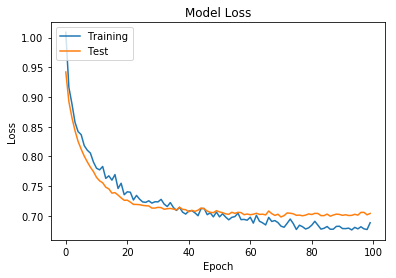

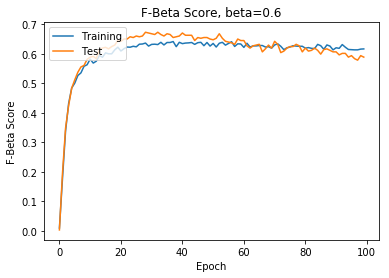

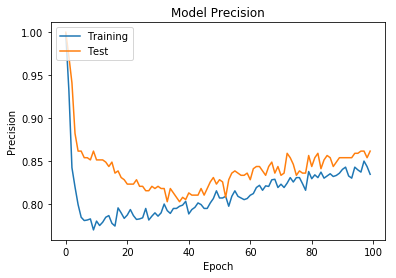

In [19]:
plot_metrics(nn)

In [20]:
#print the evaluation metrics
print("Validation Loss:", score[0])
print("Validation F-beta:", score[1])
print("Validation Precision:", score[2])

Validation Loss: 0.703946443165
Validation F-beta: 0.588235383448
Validation Precision: 0.861892583273


#### 4. Recurrent Neural Network - LSTM
Finally, we will turn ourselves to try using LSTM network. LSTM is known for its superior performance to fitting time-series data. 

One of the drawbacks of the models we used is that we assume the data is memory-less. This means we assume the present data is purely determined by the features provided, but not influenced by previous states. However in a financial context, this is not true as there are numerous studies suggesting momentum effects. (Jegadeesh, Narashimhan 1990 - Evidence of predictable behavious of security returns, Journal of Finance 45, 881-898)

LSTM provides a solution to overcome the above problems, which the network itself can pass information and pick up the long-term dependencies of time-series data.

First we need to reshape the input data as keras takes in the data structure in [n_samples, timesteps, features]. Since we want to predict the next day's movement direction, timestep is equal to 1.

In [21]:
#Reshape data
X_train_lstm = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
y_train_lstm = np.reshape(y_train, (y_train.shape[0], 1, y_train.shape[1]))
y_test_lstm = np.reshape(y_test, (y_test.shape[0], 1, y_test.shape[1]))

In [22]:
%%time

from keras.layers import LSTM

#Setting up the instance
lstm_model = Sequential()

#Adding 1st LSTM layer
lstm_model.add(LSTM(22, input_dim=input_dim, return_sequences=True))
lstm_model.add(Dropout(drop_out))

#Adding Output Layer
lstm_model.add(Dense(3, activation='softmax'))
lstm_model.summary()

#Optimization
#Define Optimizer, using Stochastic Gradient Decent
lstm_model.compile(loss='categorical_crossentropy', optimizer=adm, metrics=[fbeta, precision])

#Fitting the model
lstm = lstm_model.fit(X_train_lstm, y_train_lstm, epochs = num_epoch, verbose=2, validation_data=(X_test_lstm, y_test_lstm), shuffle=False, batch_size=1)

#Evaluation
lstm_score = lstm_model.evaluate(X_test_lstm, y_test_lstm)

#Predict
lstm_pred = lstm_model.predict(X_test_lstm, verbose=1)



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, None, 22)          5720      
_________________________________________________________________
dropout_2 (Dropout)          (None, None, 22)          0         
_________________________________________________________________
dense_3 (Dense)              (None, None, 3)           69        
Total params: 5,789
Trainable params: 5,789
Non-trainable params: 0
_________________________________________________________________
Train on 1563 samples, validate on 391 samples
Epoch 1/100
11s - loss: 0.9685 - fbeta: 0.6694 - precision: 0.9998 - val_loss: 0.9312 - val_fbeta: 0.6701 - val_precision: 1.0000
Epoch 2/100
8s - loss: 0.9166 - fbeta: 0.6923 - precision: 0.9853 - val_loss: 0.9025 - val_fbeta: 0.7093 - val_precision: 0.9940
Epoch 3/100
7s - loss: 0.8872 - fbeta: 0.7315 - precision: 0.9667 - val_loss: 0.8797 - val_fbeta: 

9s - loss: 0.6895 - fbeta: 0.8187 - precision: 0.9339 - val_loss: 0.6963 - val_fbeta: 0.8261 - val_precision: 0.9369
Epoch 59/100
7s - loss: 0.6854 - fbeta: 0.8164 - precision: 0.9307 - val_loss: 0.6978 - val_fbeta: 0.8210 - val_precision: 0.9344
Epoch 60/100
6s - loss: 0.6837 - fbeta: 0.8174 - precision: 0.9330 - val_loss: 0.6963 - val_fbeta: 0.8252 - val_precision: 0.9361
Epoch 61/100
6s - loss: 0.6802 - fbeta: 0.8155 - precision: 0.9326 - val_loss: 0.6956 - val_fbeta: 0.8252 - val_precision: 0.9361
Epoch 62/100
6s - loss: 0.6866 - fbeta: 0.8149 - precision: 0.9311 - val_loss: 0.6954 - val_fbeta: 0.8269 - val_precision: 0.9361
Epoch 63/100
5s - loss: 0.6905 - fbeta: 0.8194 - precision: 0.9326 - val_loss: 0.6950 - val_fbeta: 0.8295 - val_precision: 0.9386
Epoch 64/100
5s - loss: 0.6874 - fbeta: 0.8187 - precision: 0.9320 - val_loss: 0.6956 - val_fbeta: 0.8244 - val_precision: 0.9361
Epoch 65/100
5s - loss: 0.6835 - fbeta: 0.8153 - precision: 0.9307 - val_loss: 0.6948 - val_fbeta: 0.82

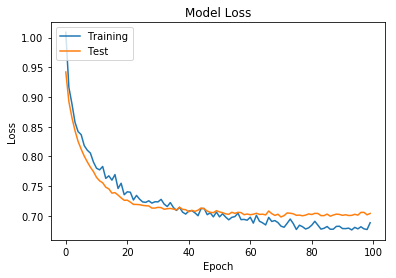

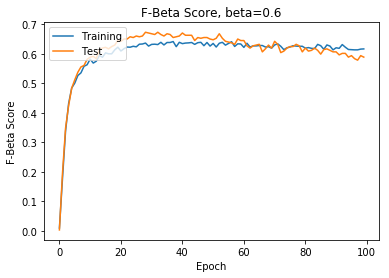

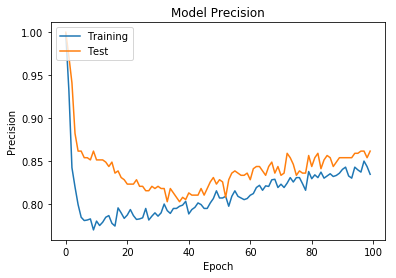

In [23]:
plot_metrics(lstm)

In [24]:
#print the evaluation metrics
print("Validation Loss:", lstm_score[0])
print("Validation F-beta:", lstm_score[1])
print("Validation Precision:", lstm_score[2])

Validation Loss: 0.693997446991
Validation F-beta: 0.821824385382
Validation Precision: 0.933503833116


The LSTM Neural Network is much superior than the models we have test before. Our validation F-beta score increases from around 0.626 to 0.826, corresponding an nearly 33% increase! Also, our precision score also increases from 0.85 to 0.94. 

The LSTM model is superior than all of our tested models suggested that the indices do have long term dependancy, and states in the past do affect states in the future. In other words, momentum effect does exist.

## Improving the Model
In this final section, we will try to see if I can further improve the model by first applying feature selection to reduce the dimentionality of the feature space, and then feed the reduced features into the best performing algorithm in the previous section - which is the LSTM model.

I will mainly apply 2 feature selection methods
- Principal Component Analysis
- Tree-based feature selection

#### 1. Principal Component Analysis

I will first perform PCA to the raw data, analyze the principal components and reduce the dimensionality of feature space. I have set the explained variance threshold to be 90%, which will pick the number of principal component that will explain up to 90%, and reduce the feature space to that number and refit to LSTM.

In [25]:
#Perform PCA to feature selection
from sklearn.decomposition import PCA #Import PCA

#Apply PCA to our raw data
pca = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

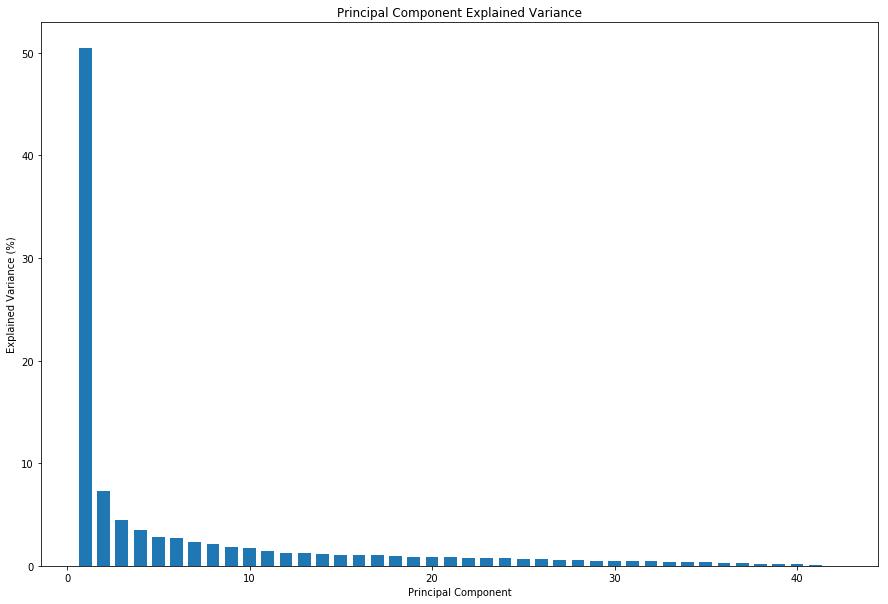

In [26]:
plt.figure(figsize=(15,10))
plt.bar(np.arange(1,43), 100*pca.explained_variance_ratio_, 0.7)
plt.title('Principal Component Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance (%)')
plt.show()

From the chart, the first principal has around 50% of the variance explained. This is significantly larger than the second, which has around 8%. Perhaps we can reduce the feature space and pick the number of components that has total explained variance over 90%.


In [27]:
#Get the number of components that has total explained variance over the threshold
threshold = 0.9
cumsum_variance = np.cumsum(pca.explained_variance_ratio_) 
num_of_pc = len(cumsum_variance[cumsum_variance < threshold]) + 1

#Refit the PCA
pca2 = PCA(n_components = num_of_pc)

#Get new reduced data
X_reduced = pd.DataFrame(pca2.fit_transform(X))

#Split into test set and validation set
X_reduced_train = np.array(X_reduced.iloc[0:(cut_index-1),:])
X_reduced_test = np.array(X_reduced.iloc[cut_index:X_reduced.shape[0],:])

X_reduced_train = np.reshape(X_reduced_train, (X_reduced_train.shape[0], 1, X_reduced_train.shape[1]))
X_reduced_test = np.reshape(X_reduced_test, (X_reduced_test.shape[0], 1, X_reduced_test.shape[1]))


In [28]:
%%time

#Refitting LSTM
#Setting up the instance
lstm_model_reduced = Sequential()

#Adding 1st LSTM layer
lstm_model_reduced.add(LSTM(11, input_dim=num_of_pc, return_sequences=True)) #adjusting number of neurons since the number of features are reduced
lstm_model_reduced.add(Dropout(drop_out))

#Adding Output Layer
lstm_model_reduced.add(Dense(3, activation='softmax'))
lstm_model_reduced.summary()

#Optimization
#Define Optimizer, using Stochastic Gradient Decent
lstm_model_reduced.compile(loss='categorical_crossentropy', optimizer=adm, metrics=[fbeta, precision])

#Fitting the model
lstm_reduced = lstm_model_reduced.fit(X_reduced_train, y_train_lstm, epochs = num_epoch, verbose=2, validation_data=(X_reduced_test, y_test_lstm), shuffle=False, batch_size=1)

#Evaluation
lstm_reduced_score = lstm_model_reduced.evaluate(X_reduced_test, y_test_lstm)

#Predict
lstm_reduced_pred = lstm_model_reduced.predict(X_reduced_test, verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, None, 11)          1408      
_________________________________________________________________
dropout_3 (Dropout)          (None, None, 11)          0         
_________________________________________________________________
dense_4 (Dense)              (None, None, 3)           36        
Total params: 1,444
Trainable params: 1,444
Non-trainable params: 0
_________________________________________________________________
Train on 1563 samples, validate on 391 samples
Epoch 1/100
5s - loss: 1.0030 - fbeta: 0.6667 - precision: 1.0000 - val_loss: 0.9679 - val_fbeta: 0.6667 - val_precision: 1.0000
Epoch 2/100
4s - loss: 0.9516 - fbeta: 0.6688 - precision: 1.0000 - val_loss: 0.9456 - val_fbeta: 0.6667 - val_precision: 1.0000
Epoch 3/100
5s - loss: 0.9387 - fbeta: 0.6724 - precision: 0.9945 - val_loss: 0.9367 - val_fbeta: 0

6s - loss: 0.7031 - fbeta: 0.8104 - precision: 0.9332 - val_loss: 0.7066 - val_fbeta: 0.8210 - val_precision: 0.9344
Epoch 60/100
5s - loss: 0.7122 - fbeta: 0.8136 - precision: 0.9339 - val_loss: 0.7069 - val_fbeta: 0.8210 - val_precision: 0.9344
Epoch 61/100
5s - loss: 0.7044 - fbeta: 0.8087 - precision: 0.9328 - val_loss: 0.7067 - val_fbeta: 0.8210 - val_precision: 0.9335
Epoch 62/100
4s - loss: 0.7091 - fbeta: 0.8125 - precision: 0.9350 - val_loss: 0.7079 - val_fbeta: 0.8227 - val_precision: 0.9352
Epoch 63/100
5s - loss: 0.7013 - fbeta: 0.8128 - precision: 0.9335 - val_loss: 0.7094 - val_fbeta: 0.8235 - val_precision: 0.9344
Epoch 64/100
5s - loss: 0.6992 - fbeta: 0.8132 - precision: 0.9332 - val_loss: 0.7058 - val_fbeta: 0.8218 - val_precision: 0.9344
Epoch 65/100
5s - loss: 0.6993 - fbeta: 0.8151 - precision: 0.9322 - val_loss: 0.7053 - val_fbeta: 0.8227 - val_precision: 0.9352
Epoch 66/100
5s - loss: 0.7025 - fbeta: 0.8089 - precision: 0.9313 - val_loss: 0.7045 - val_fbeta: 0.82

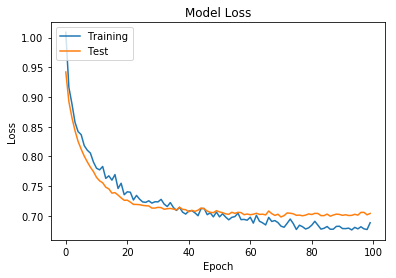

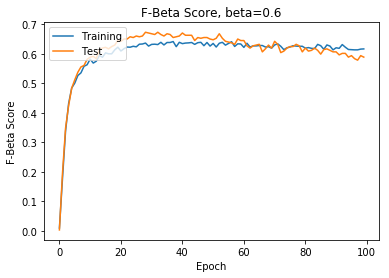

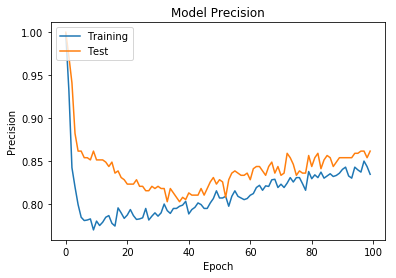

In [29]:
plot_metrics(lstm_reduced)

In [30]:
#print the evaluation metrics
print("Validation Loss:", lstm_reduced_score[0])
print("Validation F-beta:", lstm_reduced_score[1])
print("Validation Precision:", lstm_reduced_score[2])

Validation Loss: 0.702553773628
Validation F-beta: 0.823529413594
Validation Precision: 0.936061382751


From the results, there are no significat increase in both F-beta or Precision score. Although from a computational point of view, the training time for the same number of epochs is slightly shorter since there are less features. However, the effect is small is our case as the number of features are still relatively small. Perhaps the effect will be amplified when we have more features and more data to be trained.

#### 2. Tree-based Feature Selection
Finally I will try a tree-based feature selection. The feature selection criteria is based on feature importance from the previous Adaboost algorithm. 

In [31]:
#Import Tree-based Model Selection
from sklearn.feature_selection import SelectFromModel

#Select features based on mean feature importance from the previouslyfitted AdaBoost model
adaboost_reduced = SelectFromModel(adaboost_estimator.best_estimator_, prefit=True)

#Get transformed data
X_ad_reduced = pd.DataFrame(adaboost_reduced.transform(X))

#Split into test set and validation set
X_ad_reduced_train = np.array(X_ad_reduced.iloc[0:(cut_index-1),:])
X_ad_reduced_test = np.array(X_ad_reduced.iloc[cut_index:X_ad_reduced.shape[0],:])

X_ad_reduced_train = np.reshape(X_ad_reduced_train, (X_ad_reduced_train.shape[0], 1, X_ad_reduced_train.shape[1]))
X_ad_reduced_test = np.reshape(X_ad_reduced_test, (X_ad_reduced_test.shape[0], 1, X_ad_reduced_test.shape[1]))


In [32]:
%%time

#Refitting LSTM
#Setting up the instance
lstm_model_ad_reduced = Sequential()

#print(type(np.int((X_ad_reduced_train.shape[1]+3)/2))

#Calculate number of layers
num_of_layers = np.int((X_ad_reduced_train.shape[1]+3)/2)

#Adding 1st LSTM layer
lstm_model_ad_reduced.add(LSTM(num_of_layers, input_dim=X_ad_reduced_train.shape[2], return_sequences=True)) #adjusting number of neurons since the number of features are reduced
lstm_model_ad_reduced.add(Dropout(drop_out))

#Adding Output Layer
lstm_model_ad_reduced.add(Dense(3, activation='softmax'))
lstm_model_ad_reduced.summary()

#Optimization
#Define Optimizer, using Stochastic Gradient Decent
lstm_model_ad_reduced.compile(loss='categorical_crossentropy', optimizer=adm, metrics=[fbeta, precision])

#Fitting the model
lstm_ad_reduced = lstm_model_ad_reduced.fit(X_ad_reduced_train, y_train_lstm, epochs = num_epoch, verbose=2, validation_data=(X_ad_reduced_test, y_test_lstm), shuffle=False, batch_size=1)

#Evaluation
lstm_ad_reduced_score = lstm_model_ad_reduced.evaluate(X_ad_reduced_test, y_test_lstm)

#Predict
lstm_ad_reduced_pred = lstm_model_ad_reduced.predict(X_ad_reduced_test, verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, None, 2)           152       
_________________________________________________________________
dropout_4 (Dropout)          (None, None, 2)           0         
_________________________________________________________________
dense_5 (Dense)              (None, None, 3)           9         
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________
Train on 1563 samples, validate on 391 samples
Epoch 1/100
6s - loss: 1.0145 - fbeta: 0.6667 - precision: 1.0000 - val_loss: 0.9829 - val_fbeta: 0.6667 - val_precision: 1.0000
Epoch 2/100
5s - loss: 0.9724 - fbeta: 0.6667 - precision: 1.0000 - val_loss: 0.9617 - val_fbeta: 0.6667 - val_precision: 1.0000
Epoch 3/100
4s - loss: 0.9574 - fbeta: 0.6667 - precision: 1.0000 - val_loss: 0.9528 - val_fbeta: 0.666

5s - loss: 0.7978 - fbeta: 0.7603 - precision: 0.9495 - val_loss: 0.7541 - val_fbeta: 0.8235 - val_precision: 0.9488
Epoch 60/100
5s - loss: 0.7908 - fbeta: 0.7624 - precision: 0.9544 - val_loss: 0.7520 - val_fbeta: 0.8278 - val_precision: 0.9514
Epoch 61/100
5s - loss: 0.8013 - fbeta: 0.7586 - precision: 0.9527 - val_loss: 0.7513 - val_fbeta: 0.8269 - val_precision: 0.9497
Epoch 62/100
5s - loss: 0.7944 - fbeta: 0.7616 - precision: 0.9524 - val_loss: 0.7503 - val_fbeta: 0.8295 - val_precision: 0.9514
Epoch 63/100
5s - loss: 0.8011 - fbeta: 0.7567 - precision: 0.9509 - val_loss: 0.7514 - val_fbeta: 0.8210 - val_precision: 0.9480
Epoch 64/100
5s - loss: 0.8027 - fbeta: 0.7560 - precision: 0.9509 - val_loss: 0.7498 - val_fbeta: 0.8269 - val_precision: 0.9488
Epoch 65/100
5s - loss: 0.7922 - fbeta: 0.7565 - precision: 0.9541 - val_loss: 0.7483 - val_fbeta: 0.8261 - val_precision: 0.9488
Epoch 66/100
5s - loss: 0.7897 - fbeta: 0.7582 - precision: 0.9537 - val_loss: 0.7466 - val_fbeta: 0.82

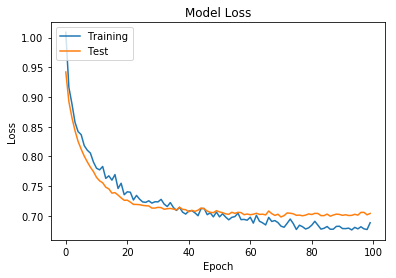

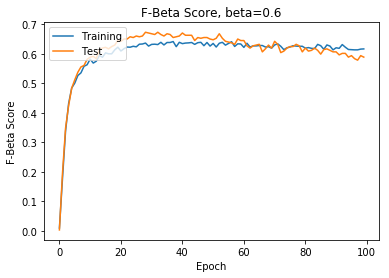

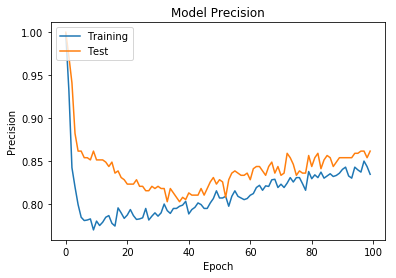

In [33]:
plot_metrics(lstm_model_ad_reduced)

In [34]:
#print the evaluation metrics
print("Validation Loss:", lstm_ad_reduced_score[0])
print("Validation F-beta:", lstm_ad_reduced_score[1])
print("Validation Precision:", lstm_ad_reduced_score[2])

Validation Loss: 0.73534660129
Validation F-beta: 0.815004272534
Validation Precision: 0.941176477143


More or less the tree-based selection method has similar metrics produced compared to PCA. Again the advantage seems to be more from a computational efficiency point of view.

## Conclusion

In this exercise, I investigated the relationship between Hang Seng Index's movement with respect to 42 selected global exchange indices. I wanted to create a classification algorithm to predict Hang Seng Index's movement based on rest of the indices and ultimately a trading strategy based on the model.

The sample of data consists of 5 years of daily closing index levels. I have pre-processed the data by adding a suitable lag to incorporate different time-zones in the market, and also transformed the data from absolute levels to returns to normalize it.

Using Naive Gaussian Bayes as the benchmark model, I have experimented with a few learning algorithms and compare their performance based on F-beta value (with beta = 0.6) and precision. The algorithms are:
- Logistic Regression
- AdaBoost
- Feed-Forward Neural Network
- LSTM

Hyperparameters in Logistic Regression and Adaboost are selected based on cross-valiation. While for Neural Network models, I am using 100 epochs, Nestrov Adam optimizer with a learning rate = 0.0003. All Neural Network models have only 1 hidden layer.

All models except Logistic Regression performs better than the benchmark model. AdaBoost and Feed-forward Neural Network has a similar F-beta score at around 0.6, while the Neural Network has a much higher precision. The best performing model is the LSTM network, which has over 0.8 F-beta score, and a precision 0.9. One possible explanation towards a superior performance might be due to "momentum" effects on the financial time series, where current states are correlated to previous states and our LSTM network is able to capture this phenomenon.

Finally I have explored whether reducing the feature space would improve the model performance. I have applied both PCA and tree-based feature selection to reduce the feature space, and feed the reduced feature into LSTM model. Both cases have shown a similar model performance to the original LSTM model, however, there is a slight but not significant improvement in the training time. Perhaps the effect will be amplified when we have more features and more data in the training set.


